In [2]:
import numpy as np
import pandas as pd

In [3]:
movies = pd.read_csv('/content/movies.csv',sep=';',encoding='latin-1').drop('Unnamed: 3',axis=1)
print('Shape of this dataset :',movies.shape)
movies.head()

Shape of this dataset : (3883, 3)


,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings = pd.read_csv('/content/ratings.csv',sep=';')
print('Shape of this dataset :',ratings.shape)
ratings.head()

Shape of this dataset : (1000209, 4)


,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
users = pd.read_csv('/content/users.csv',sep=';')
print('Shape of this dataset :',users.shape)
users.head()

Shape of this dataset : (6040, 5)


,userId,gender,age,occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,2460
4,5,M,25,20,55455


Recommendation System using Collaborative Filtering¶
This Recommendation System will works like "people who watching and like this movie also watch and like that movies".

Pivot Table with respect to ratings given by users to movies

In [6]:
rating_pivot = ratings.pivot_table(values='rating',columns='userId',index='movieId').fillna(0)
print('Shape of this pivot table :',rating_pivot.shape)
rating_pivot.head()

Shape of this pivot table : (3706, 6040)


userId,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
movieId,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,5.0,5.0,...,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
from sklearn.neighbors import NearestNeighbors
nn_algo = NearestNeighbors(metric='cosine')
nn_algo.fit(rating_pivot)

NearestNeighbors(metric='cosine')

In [8]:
class Recommender:
    def __init__(self):
        # This list will stored movies that called atleast ones using recommend_on_movie method
        self.hist = []
        self.ishist = False # Check if history is empty

    # This method will recommend movies based on a movie that passed as the parameter
    def recommend_on_movie(self,movie,n_reccomend = 5):
        self.ishist = True
        movieid = int(movies[movies['title']==movie]['movieId'])
        self.hist.append(movieid)
        distance,neighbors = nn_algo.kneighbors([rating_pivot.loc[movieid]],n_neighbors=n_reccomend+1)
        movieids = [rating_pivot.iloc[i].name for i in neighbors[0]]
        recommeds = [str(movies[movies['movieId']==mid]['title']).split('\n')[0].split('  ')[-1] for mid in movieids if mid not in [movieid]]
        return recommeds[:n_reccomend]

    # This method will recommend movies based on history stored in self.hist list
    def recommend_on_history(self,n_reccomend = 5):
        if self.ishist == False:
            return print('No history found')
        history = np.array([list(rating_pivot.loc[mid]) for mid in self.hist])
        distance,neighbors = nn_algo.kneighbors([np.average(history,axis=0)],n_neighbors=n_reccomend + len(self.hist))
        movieids = [rating_pivot.iloc[i].name for i in neighbors[0]]
        recommeds = [str(movies[movies['movieId']==mid]['title']).split('\n')[0].split('  ')[-1] for mid in movieids if mid not in self.hist]
        return recommeds[:n_reccomend]

In [9]:
# linitializing the Recommender Object
recommender = Recommender()

In [10]:
# Recommendation based on past watched movies, but the object just initialized. So, therefore no history found
recommender.recommend_on_history()

No history found


In [11]:
# Recommendation based on this movie
recommender.recommend_on_movie('Father of the Bride Part II (1995)')

/tmp/ipython-input-4069517492.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  movieid = int(movies[movies['title']==movie]['movieId'])


['Home Alone (1990)',
 'Home Alone 2',
 'Mighty Ducks, The (1992)',
 'Mrs. Doubtfire (1993)',
 'Liar Liar (1997)']

In [12]:
# Recommendation based on past watched movies, and this time a movie is there in the history.
recommender.recommend_on_history()

['Home Alone (1990)',
 'Home Alone 2',
 'Mighty Ducks, The (1992)',
 'Mrs. Doubtfire (1993)',
 'Liar Liar (1997)']

In [13]:
# Recommendation based on this movie
recommender.recommend_on_movie('Tigerland (2000)')

/tmp/ipython-input-4069517492.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  movieid = int(movies[movies['title']==movie]['movieId'])


['Requiem for a Dream (2000)',
 'Yards, The (1999)',
 'Steal This Movie! (2000)',
 'Contender, The (2000)',
 'Dancer in the Dark (2000)']

In [14]:
# Recommendation based on past watched movies, and this time two movies is there in the history.
recommender.recommend_on_history()

['Home Alone 2',
 'Home Alone (1990)',
 'Mrs. Doubtfire (1993)',
 'Liar Liar (1997)',
 'Mighty Ducks, The (1992)']

In [15]:
# Recommendation based on this movie
recommender.recommend_on_movie('Dracula')

/tmp/ipython-input-4069517492.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  movieid = int(movies[movies['title']==movie]['movieId'])


['Spy Hard (1996)',
 'Bio-Dome (1996)',
 'Mafia! (1998)',
 'Gremlins 2',
 'Down Periscope (1996)']

In [16]:
# Recommendation based on past watched movies, and this time three movies is there in the history.
recommender.recommend_on_history()

['Home Alone 2',
 'Robin Hood',
 'Flintstones, The (1994)',
 'Home Alone (1990)',
 'Multiplicity (1996)']

In [17]:
# Recommendation based on this movie
recommender.recommend_on_movie('Money Train (1995)')

/tmp/ipython-input-4069517492.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  movieid = int(movies[movies['title']==movie]['movieId'])


['Specialist, The (1994)',
 'Bulletproof (1996)',
 'Marked for Death (1990)',
 'Beverly Hills Cop III (1994)',
 'Cliffhanger (1993)']

In [18]:
# Recommendation based on past watched movies, and this time four movies is there in the history.
recommender.recommend_on_history()

['Home Alone 2',
 'Robin Hood',
 'Batman Forever (1995)',
 'Flintstones, The (1994)',
 'Beverly Hills Cop III (1994)']

In [19]:
# Recommendation based on this movie
recommender.recommend_on_movie('GoldenEye (1995)')

/tmp/ipython-input-4069517492.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  movieid = int(movies[movies['title']==movie]['movieId'])


['Tomorrow Never Dies (1997)',
 'Die Hard 2 (1990)',
 'Rock, The (1996)',
 'Mission',
 'Clear and Present Danger (1994)']

In [20]:
# Recommendation based on past watched movies, and this time five movies is there in the history.
recommender.recommend_on_history()

['Tomorrow Never Dies (1997)',
 'Die Hard',
 'Die Hard 2 (1990)',
 'Batman Returns (1992)',
 'Rock, The (1996)']

Distribution of Ratings
This histogram shows how ratings are distributed across all users (e.g., how many 5-star ratings vs. 1-star). It helps understand user rating behavior.

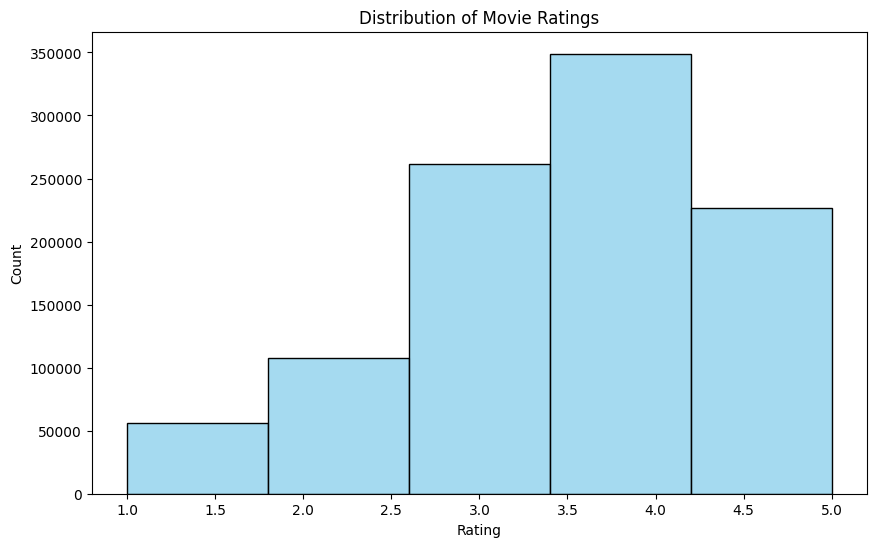

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=5, kde=False, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Number of Ratings per Movie (Top 20 Movies)

/tmp/ipython-input-596760008.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movie_rating_counts.values, y=movie_titles, palette='viridis')


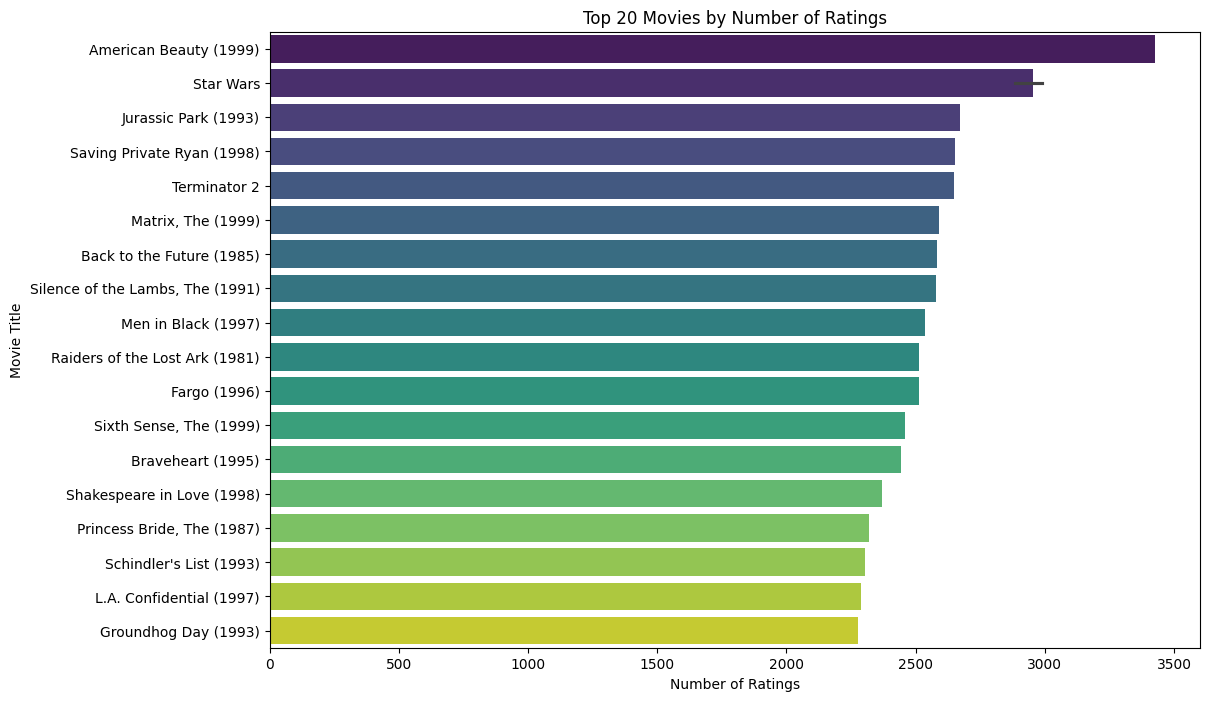

In [22]:
movie_rating_counts = ratings.groupby('movieId').size().sort_values(ascending=False).head(20)
movie_titles = movies.set_index('movieId').loc[movie_rating_counts.index]['title']

plt.figure(figsize=(12, 8))
sns.barplot(x=movie_rating_counts.values, y=movie_titles, palette='viridis')
plt.title('Top 20 Movies by Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()

Number of Ratings per User (Distribution)

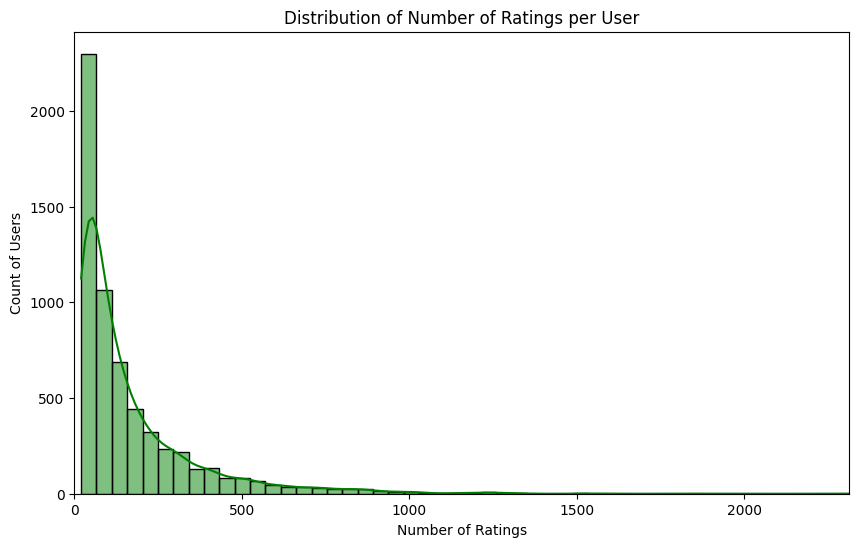

In [23]:
user_rating_counts = ratings.groupby('userId').size()

plt.figure(figsize=(10, 6))
sns.histplot(user_rating_counts, bins=50, kde=True, color='green')
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Users')
plt.xlim(0, user_rating_counts.max())  # Adjust if needed for outliers
plt.show()

Scatter Plot of Number of Ratings vs. Average Rating per Movie

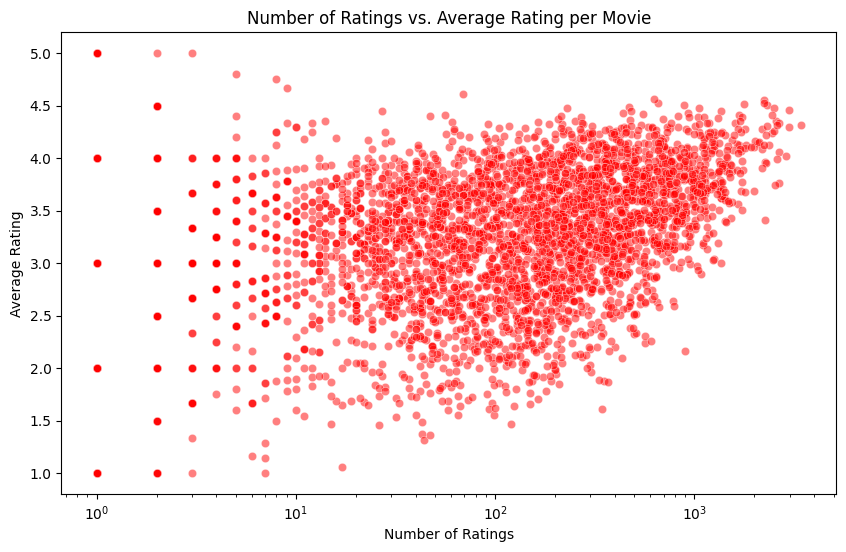

In [24]:
movie_stats = ratings.groupby('movieId').agg({'rating': ['mean', 'count']})
movie_stats.columns = ['avg_rating', 'num_ratings']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_ratings', y='avg_rating', data=movie_stats, alpha=0.5, color='red')
plt.title('Number of Ratings vs. Average Rating per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.xscale('log')  # Log scale for better visibility
plt.show()

Top 10 Highest Rated Movies (Average Rating, Min 100 Ratings)

/tmp/ipython-input-1713129606.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_movies['avg_rating'], y=movie_titles, palette='magma')


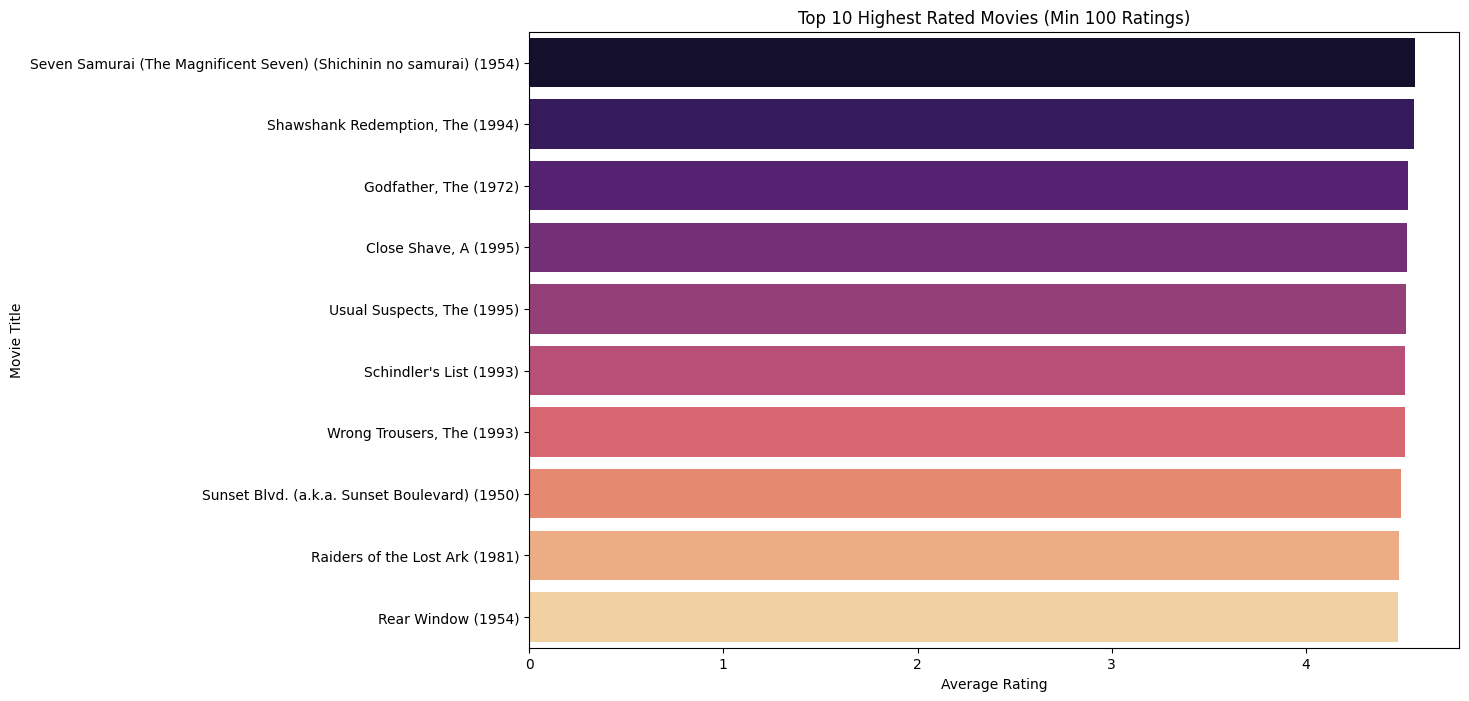

In [25]:
movie_stats = ratings.groupby('movieId').agg({'rating': ['mean', 'count']})
movie_stats.columns = ['avg_rating', 'num_ratings']
popular_movies = movie_stats[movie_stats['num_ratings'] >= 100].sort_values('avg_rating', ascending=False).head(10)

movie_titles = movies.set_index('movieId').loc[popular_movies.index]['title']

plt.figure(figsize=(12, 8))
sns.barplot(x=popular_movies['avg_rating'], y=movie_titles, palette='magma')
plt.title('Top 10 Highest Rated Movies (Min 100 Ratings)')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()